# **Desafio de Classificação**

Nome: Camila Sayaka Hiura N°USP11218323

# **Descrição do problema e análise dos dados**

Os canais online de reserva de hotéis mudaram drasticamente as possibilidades de reserva e o comportamento dos clientes. Um número significativo de reservas é cancelado devido a cancelamentos ou não comparecimentos e os motivos típicos incluem mudança de planos, conflitos de agendamento, etc. Isso geralmente é facilitado pela opção de fazê-lo gratuitamente ou, de preferência, a um custo baixo, o que é benéfico para os hóspedes do hotel, mas é menos desejável e lucrativo para os hotéis.

O trabalho tem como objetivo desenvolver e implementar métodos que consigam identificar se um hóspede irá cancelar sua reserva ou não, apresentando uma análise detalhada do conjunto de dados e descrição das transformações de dados realizadas.


# **Imports**

In [111]:
import pandas as pd # biblioteca Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados
import numpy as np
import seaborn as sns

# **Leitura dos dados**

In [135]:
data = pd.read_csv('/content/Hotel Reservations.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(10)

Número de linhas e colunas: (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


# **Análise Exploratória dos Dados**

Vamos analisar as informações sobre o número de colunas, rótulos de coluna, tipos de dados de coluna, uso de memória, índice de intervalo e o número de células em cada coluna (valores não nulos).

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [114]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [115]:
data[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status']].describe()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


In [116]:
mediana = data.median() 
print("Mediana ", mediana)

Mediana  no_of_adults                               2.00
no_of_children                             0.00
no_of_weekend_nights                       1.00
no_of_week_nights                          2.00
required_car_parking_space                 0.00
lead_time                                 57.00
arrival_year                            2018.00
arrival_month                              8.00
arrival_date                              16.00
repeated_guest                             0.00
no_of_previous_cancellations               0.00
no_of_previous_bookings_not_canceled       0.00
avg_price_per_room                        99.45
no_of_special_requests                     0.00
dtype: float64


<ipython-input-116-3c4b1f323ef0>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [22]:
variancia = data.var() 
print("Variância ", variancia)

Variância  no_of_adults                               0.269065
no_of_children                             0.162125
no_of_weekend_nights                       0.758020
no_of_week_nights                          1.990653
required_car_parking_space                 0.030026
lead_time                               7384.105259
arrival_year                               0.147330
arrival_month                              9.424252
arrival_date                              76.395420
repeated_guest                             0.024981
no_of_previous_cancellations               0.135668
no_of_previous_bookings_not_canceled       3.077115
avg_price_per_room                      1231.267679
no_of_special_requests                     0.618167
dtype: float64


<ipython-input-22-8ccda8972d4d>:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0, 0.5, 'Frequência')

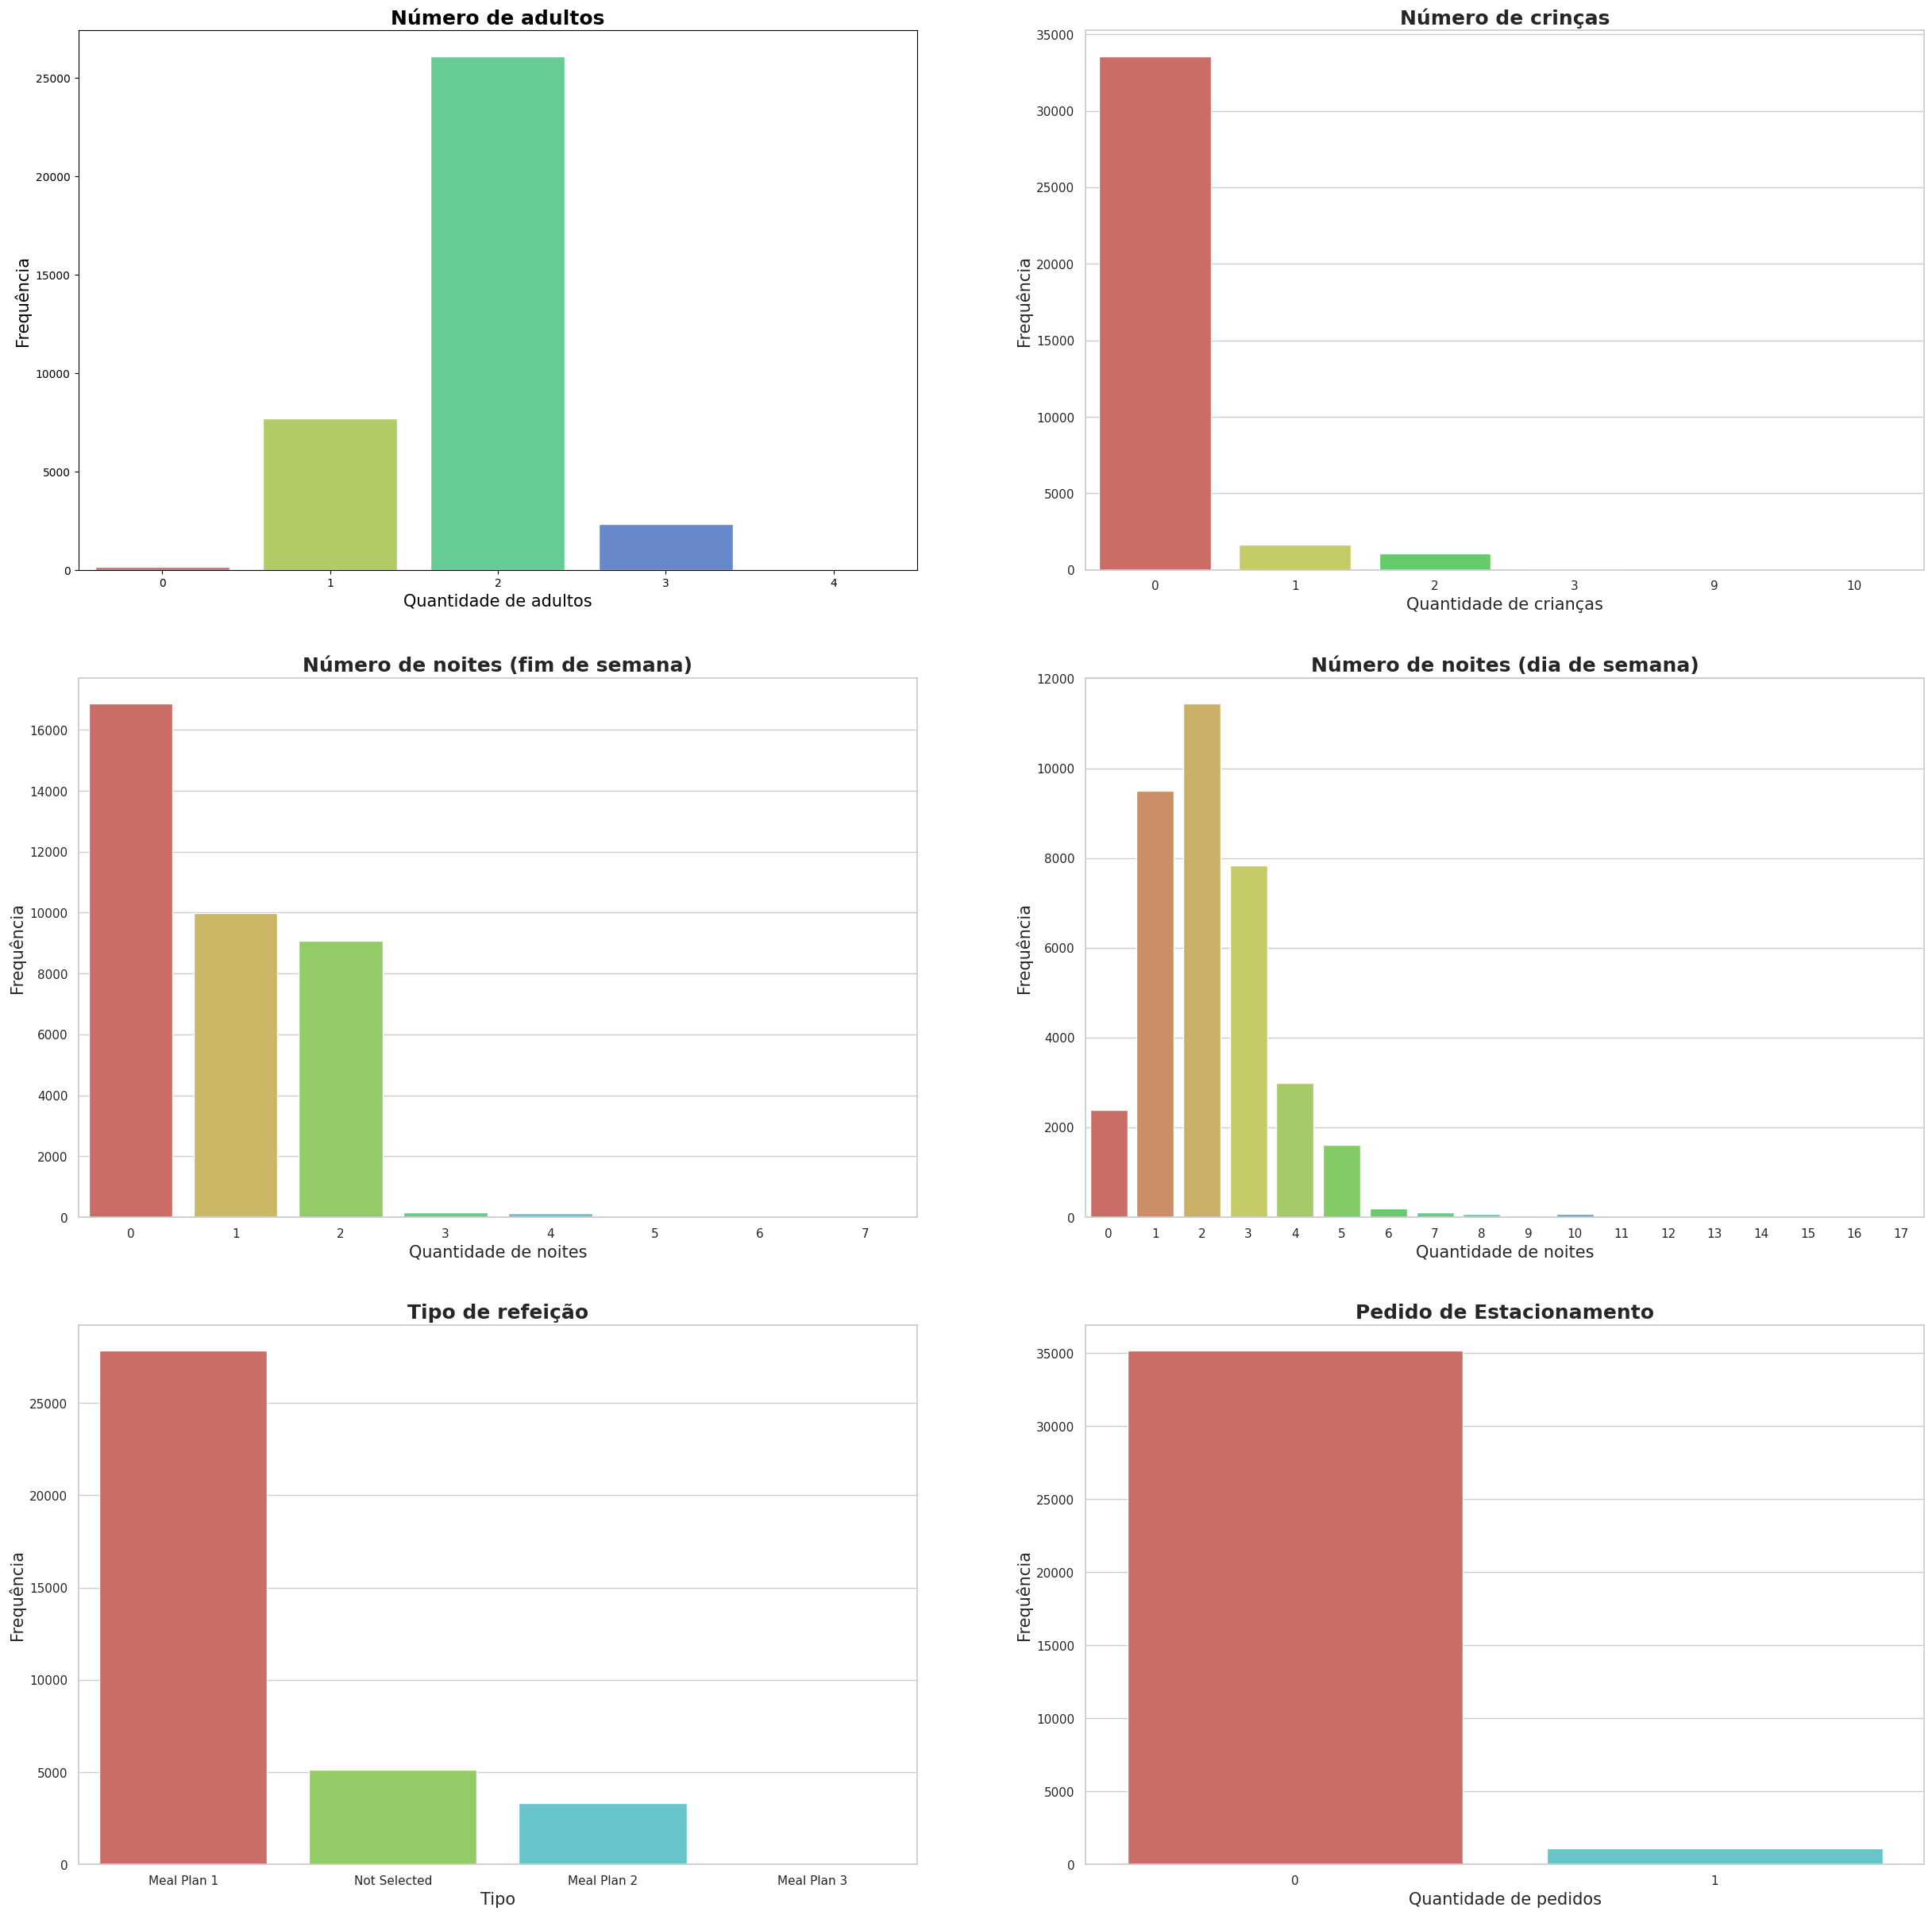

In [23]:
plt.figure(figsize = (30,30))

plt.subplot(3,2,1)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_adults"], palette = "hls")
ax.set_title('Número de adultos', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de adultos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,2)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_children"], palette = "hls")
ax.set_title('Número de crinças', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de crianças', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,3)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_weekend_nights"], palette = "hls")
ax.set_title('Número de noites (fim de semana)', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de noites', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,4)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_week_nights"], palette = "hls")
ax.set_title('Número de noites (dia de semana)', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de noites', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,5)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["type_of_meal_plan"], palette = "hls")
ax.set_title('Tipo de refeição', fontsize=18, fontweight='bold')
ax.set_xlabel('Tipo', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,6)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["required_car_parking_space"], palette = "hls")
ax.set_title('Pedido de Estacionamento', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de pedidos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

Text(0, 0.5, 'Frequência')

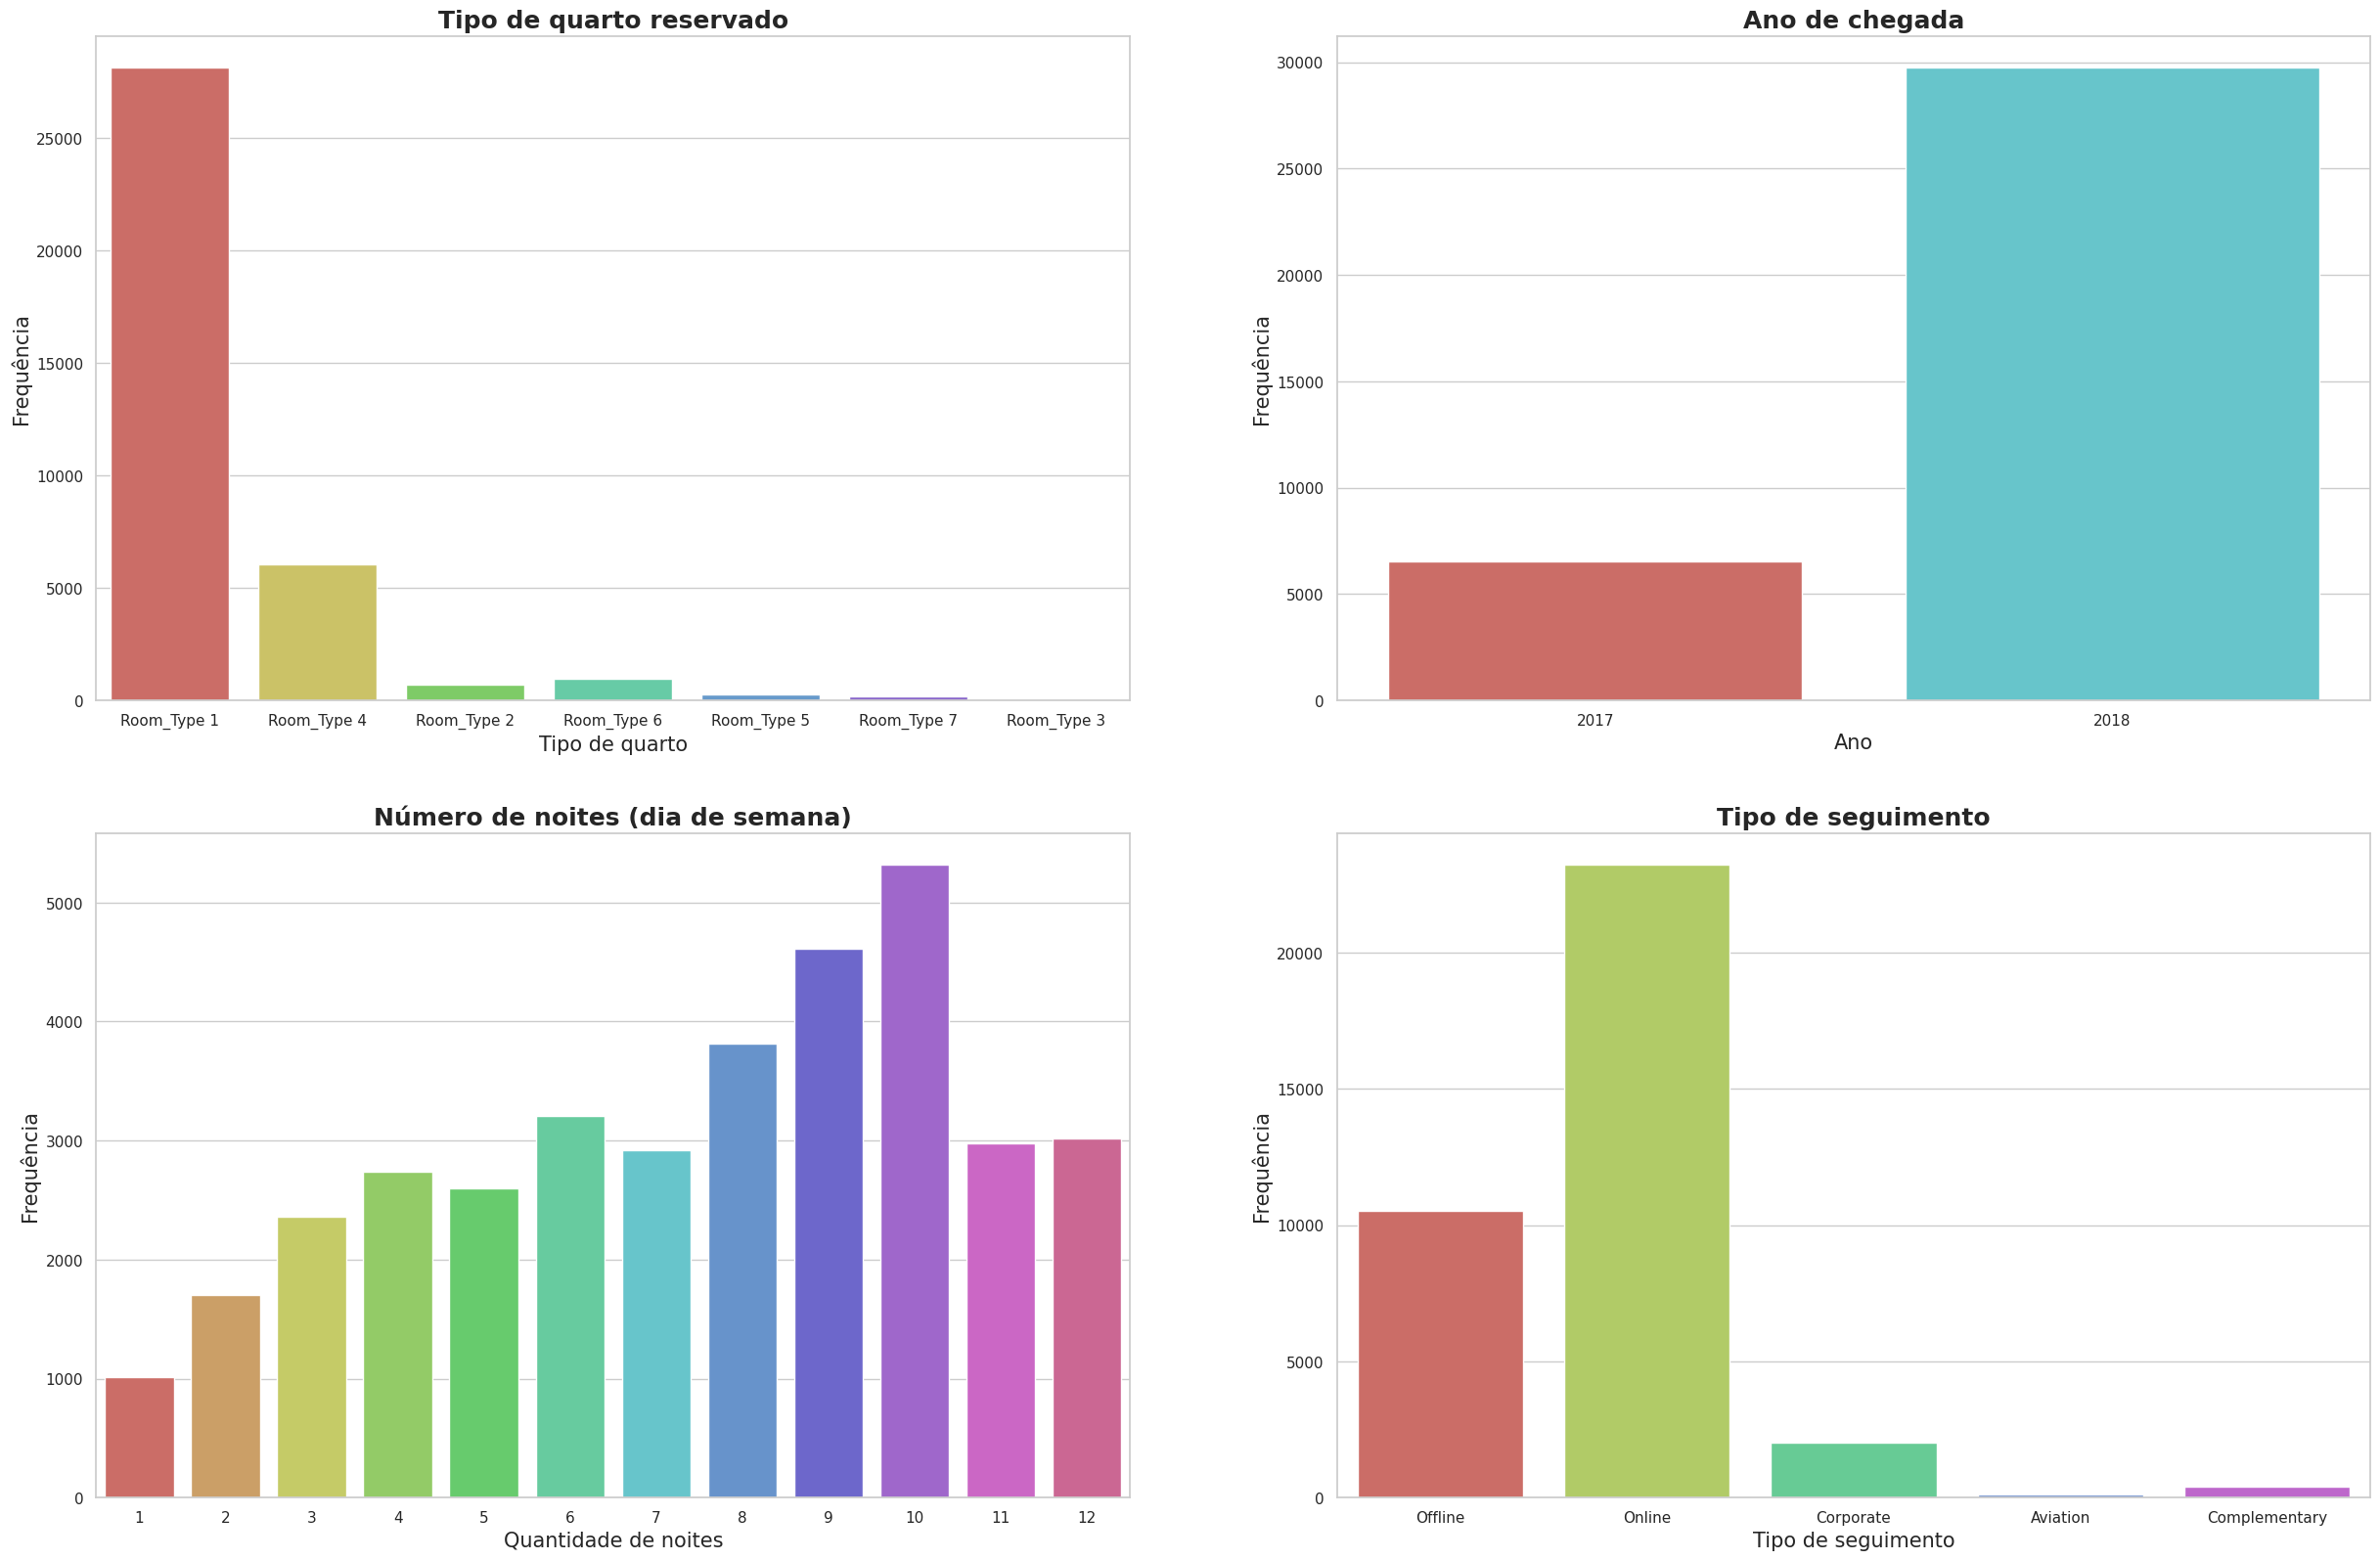

In [24]:
plt.figure(figsize = (30,30))

plt.subplot(3,2,1)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["room_type_reserved"], palette = "hls")
ax.set_title('Tipo de quarto reservado', fontsize=18, fontweight='bold')
ax.set_xlabel('Tipo de quarto', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,2)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["arrival_year"], palette = "hls")
ax.set_title('Ano de chegada', fontsize=18, fontweight='bold')
ax.set_xlabel('Ano', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,3)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["arrival_month"], palette = "hls")
ax.set_title('Número de noites (dia de semana)', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de noites', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,4)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["market_segment_type"], palette = "hls")
ax.set_title('Tipo de seguimento', fontsize=18, fontweight='bold')
ax.set_xlabel('Tipo de seguimento', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)


Text(0, 0.5, 'Frequência')

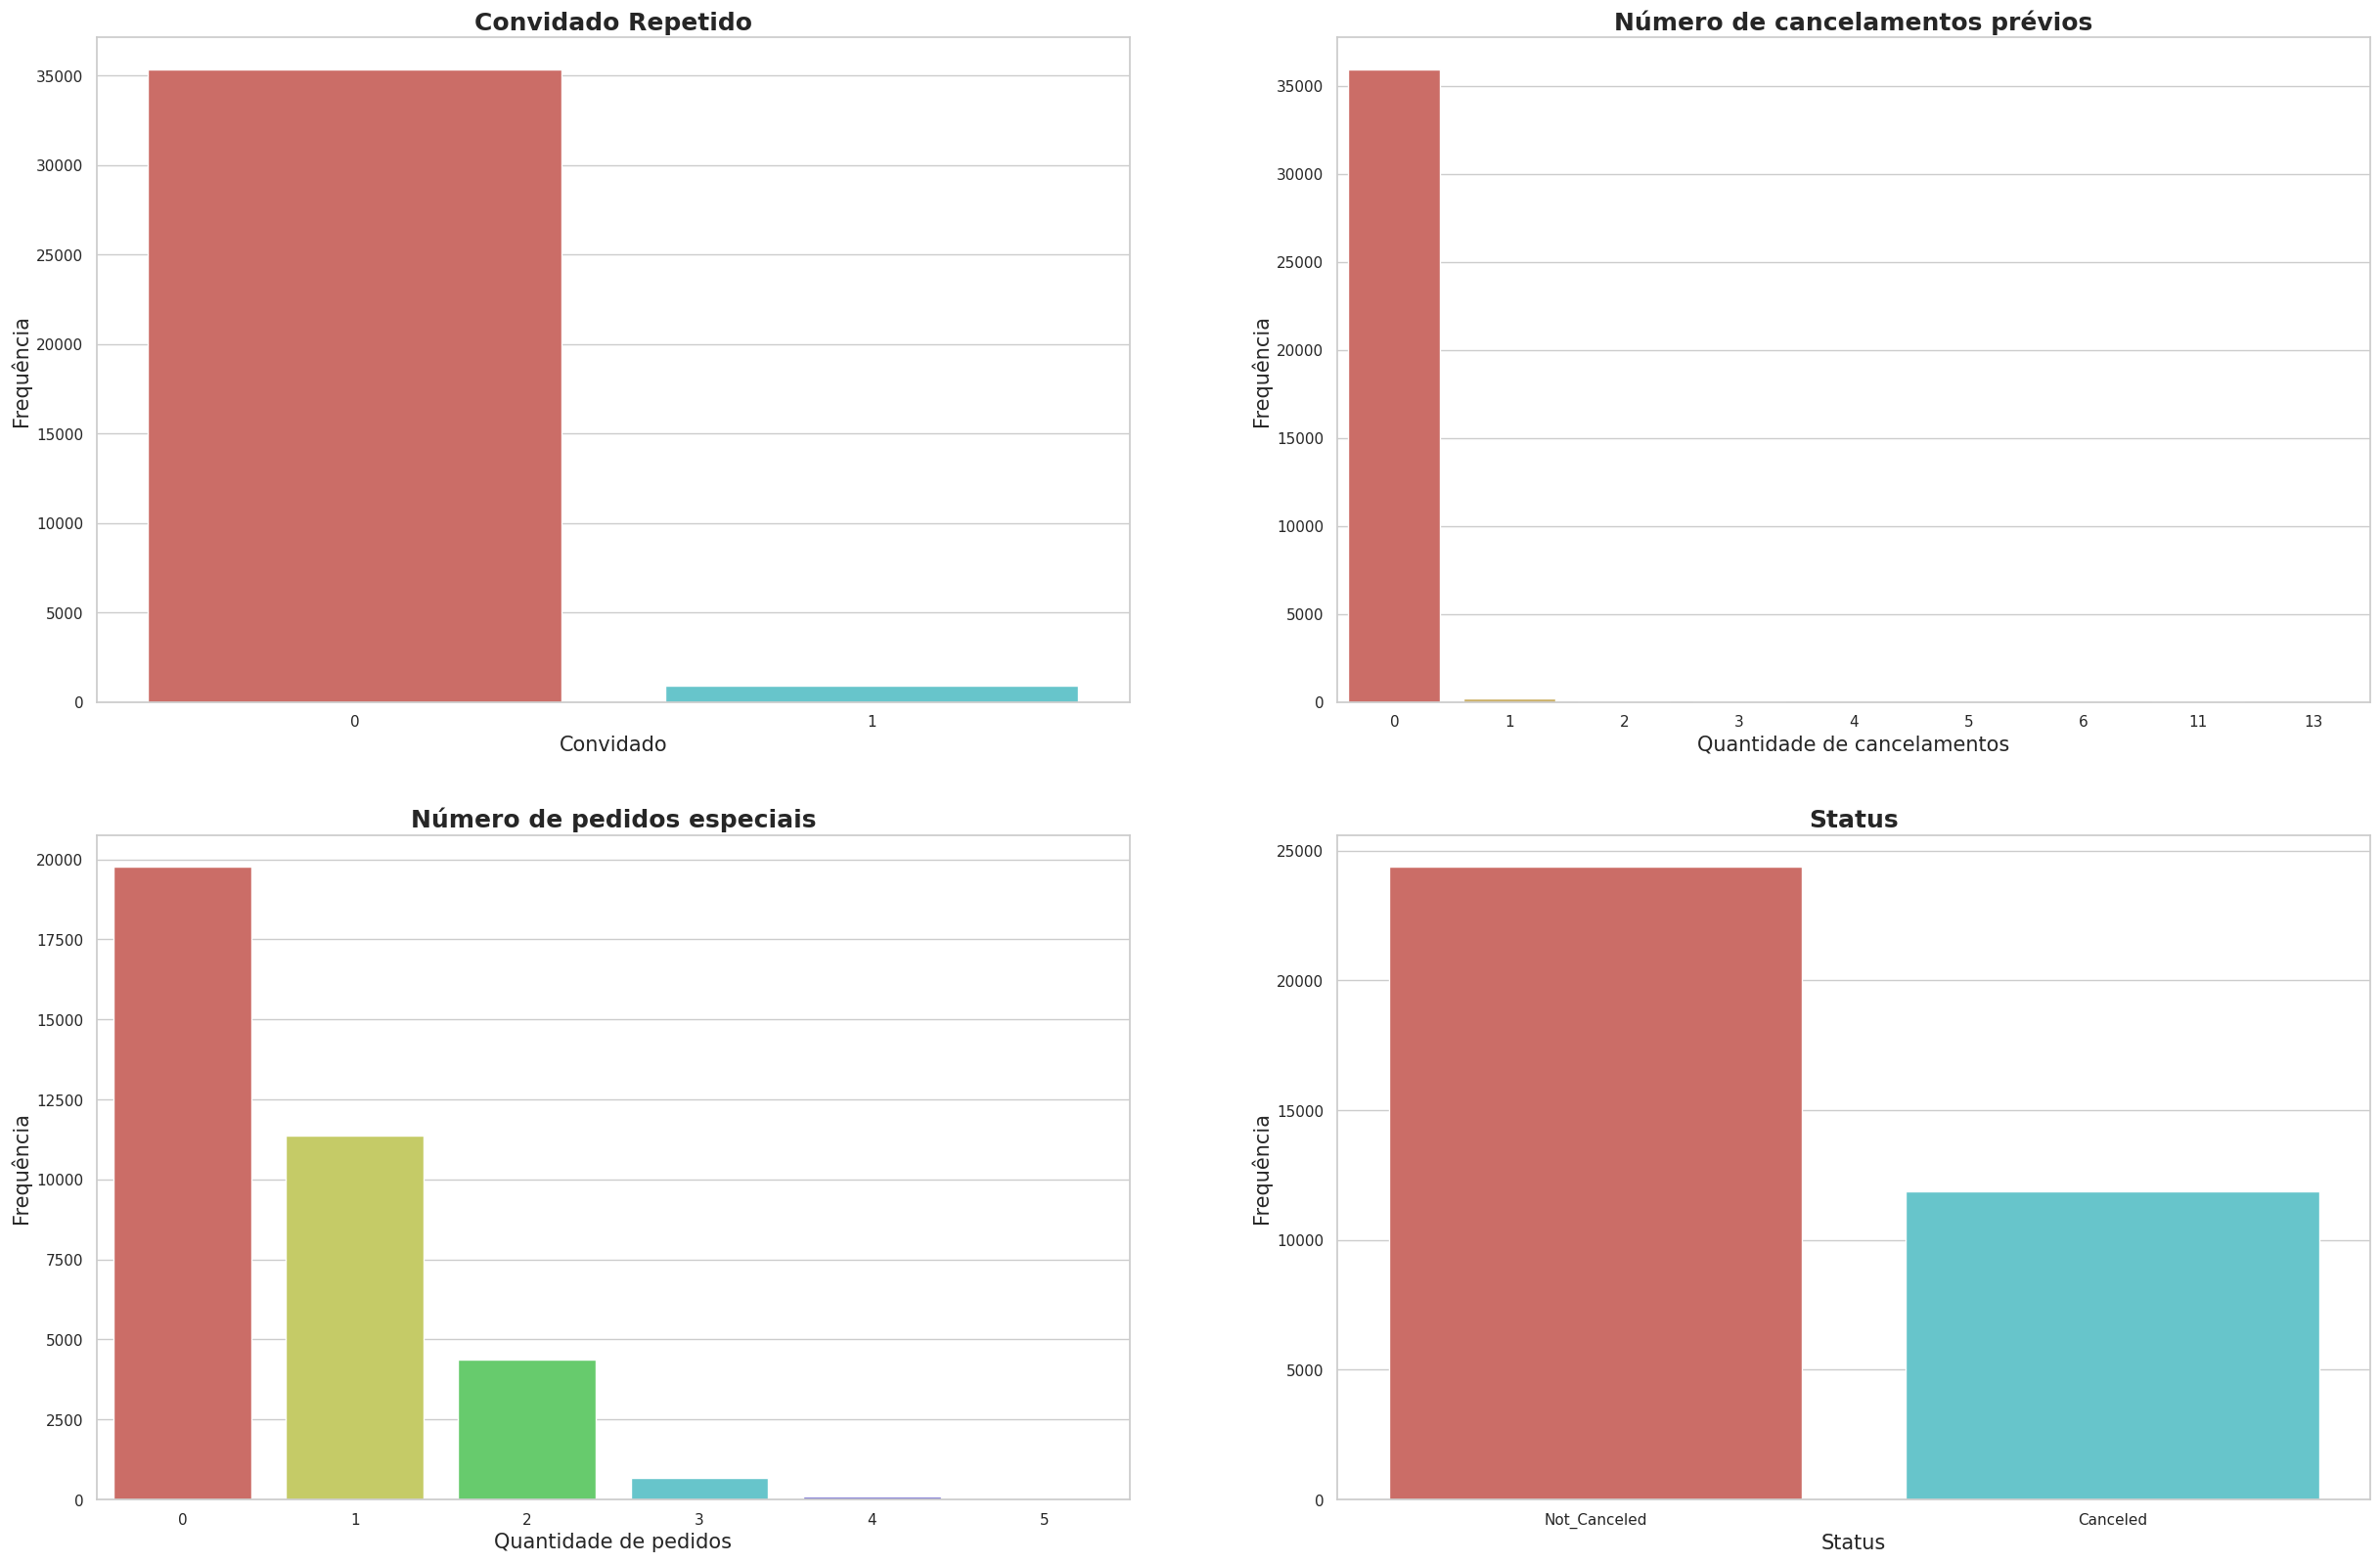

In [25]:
plt.figure(figsize = (30,30))

plt.subplot(3,2,1)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["repeated_guest"], palette = "hls")
ax.set_title('Convidado Repetido', fontsize=18, fontweight='bold')
ax.set_xlabel('Convidado', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,2)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_previous_cancellations"], palette = "hls")
ax.set_title('Número de cancelamentos prévios', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de cancelamentos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,3)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["no_of_special_requests"], palette = "hls")
ax.set_title('Número de pedidos especiais', fontsize=18, fontweight='bold')
ax.set_xlabel('Quantidade de pedidos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(3,2,4)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=data["booking_status"], palette = "hls")
ax.set_title('Status', fontsize=18, fontweight='bold')
ax.set_xlabel('Status', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

<ipython-input-35-cd8a9ec397d8>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-35-cd8a9ec397d8>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-35-cd8a9ec397d8>:20: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-35-cd8a9ec397d8>:28: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0, 0.5, 'Frequência')

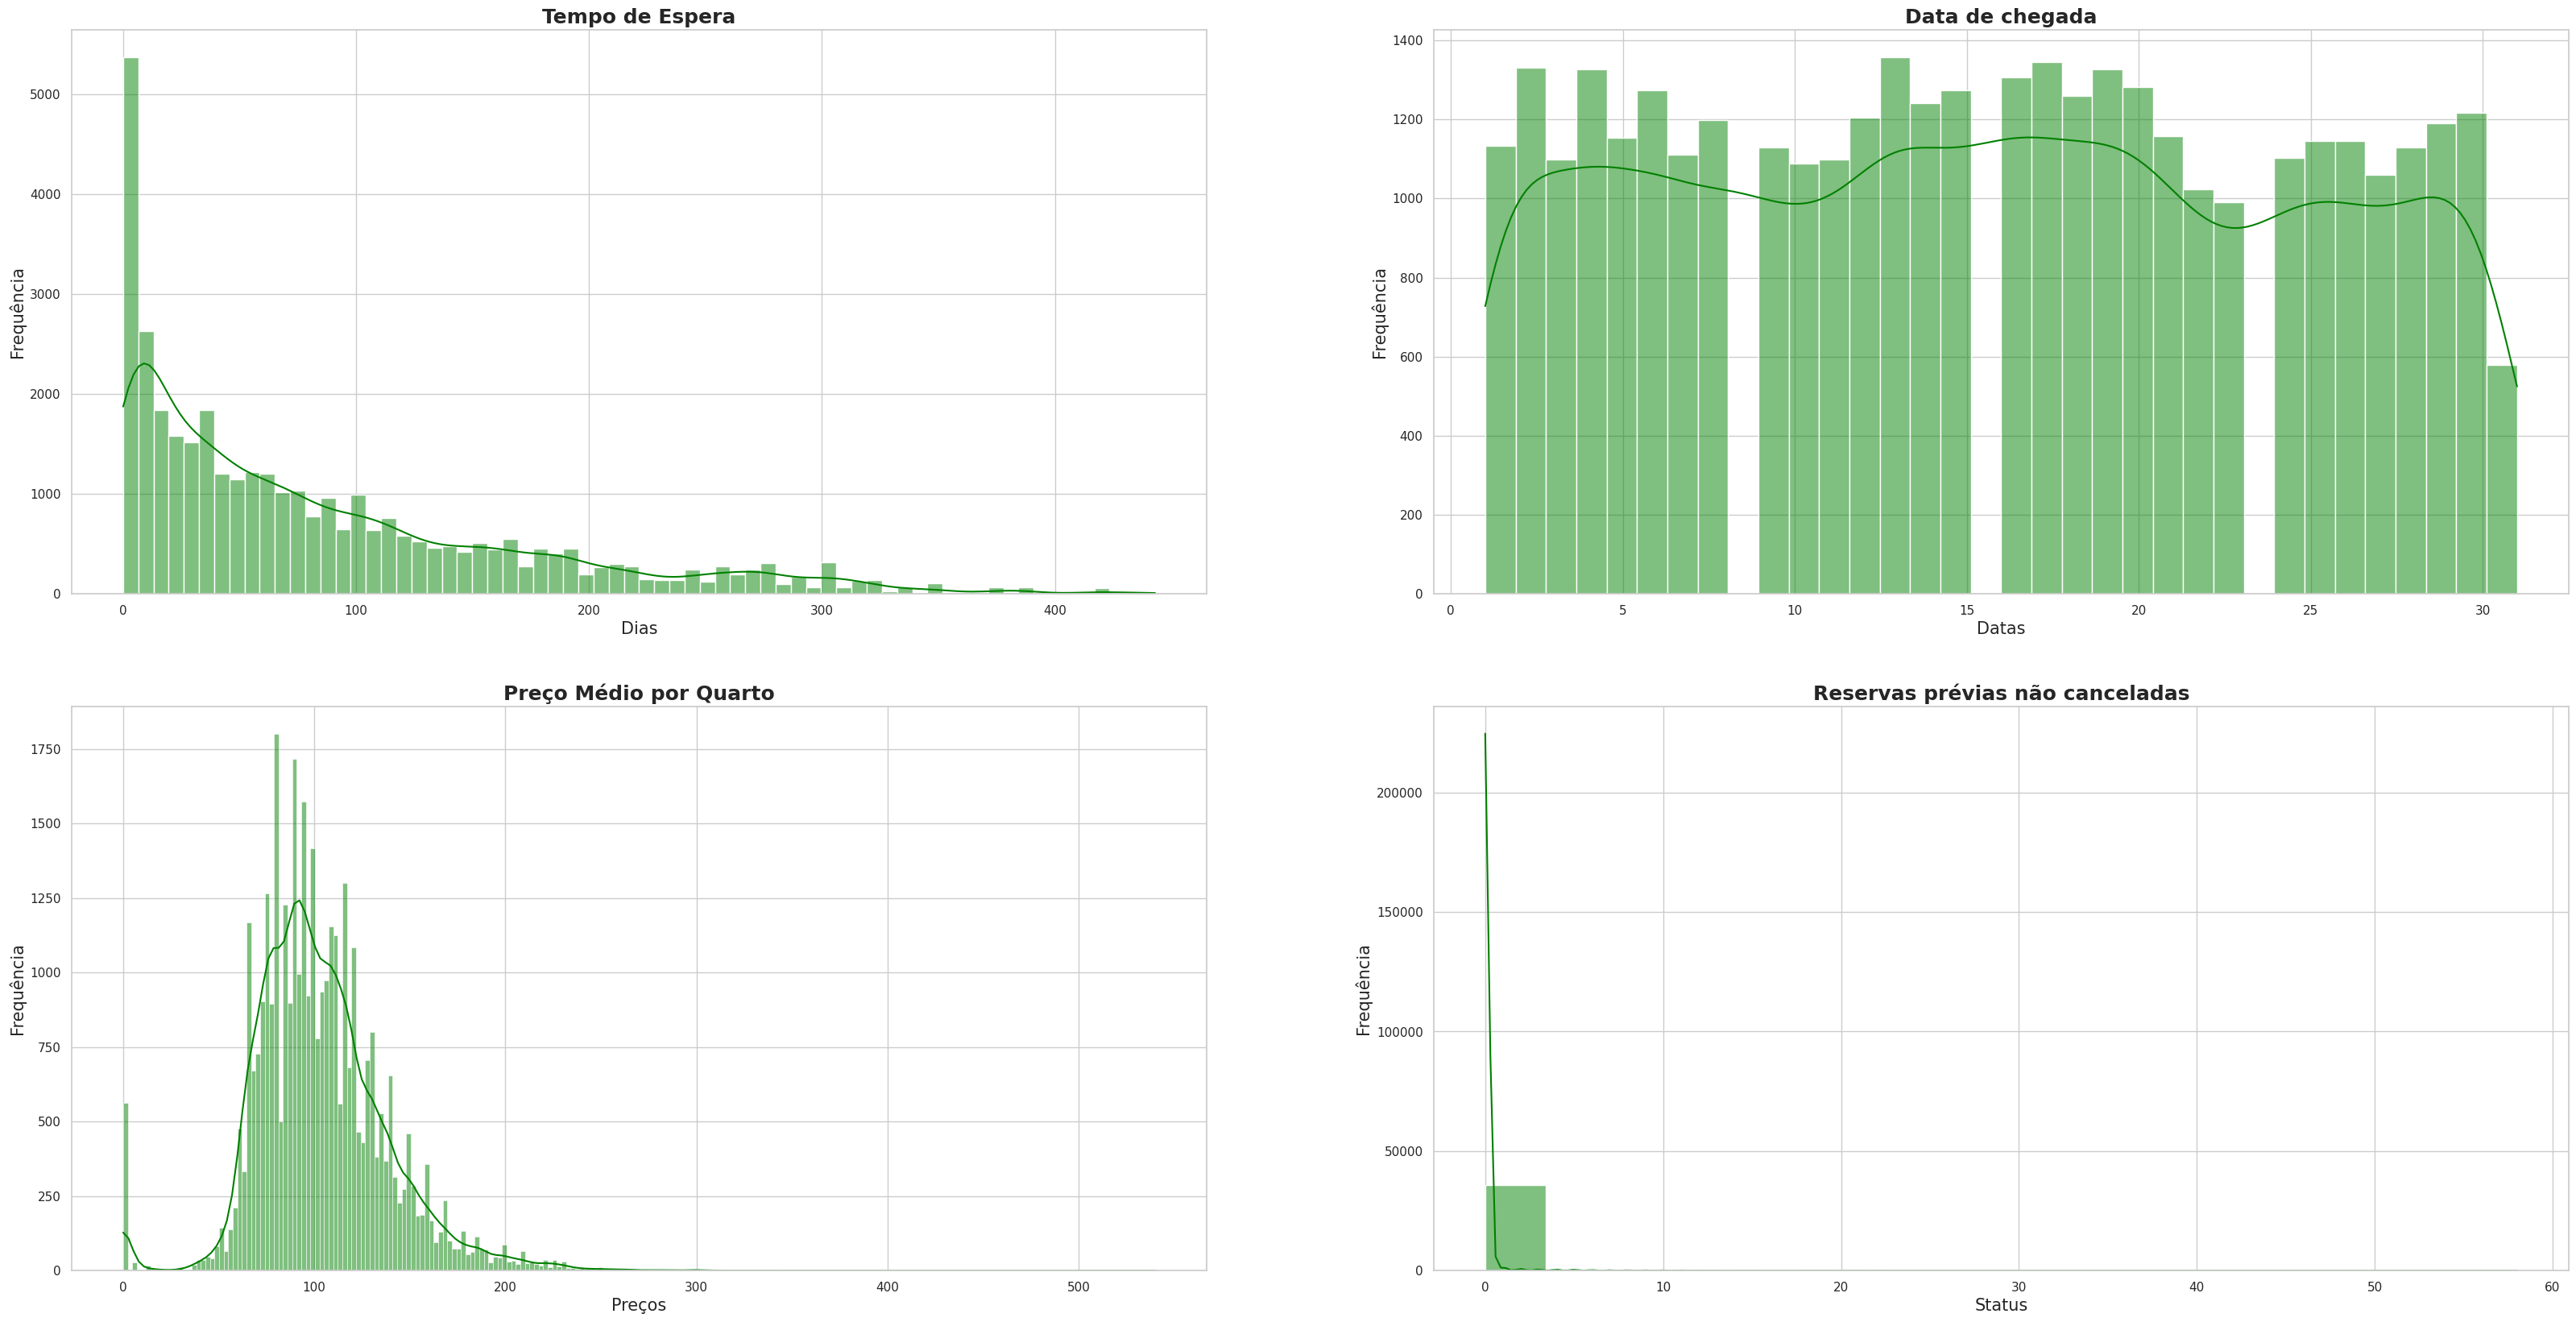

In [35]:
plt.figure(figsize = (40,20))

plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
ax = sns.histplot(data['lead_time'], kde = True, palette = "hls", color = 'green') 
ax.set_title('Tempo de Espera', fontsize=18, fontweight='bold')
ax.set_xlabel('Dias', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

plt.subplot(2,2,2)
sns.set_theme(style="whitegrid")
ax = sns.histplot(data['arrival_date'], kde = True, palette = "hls", color = 'green')
ax.set_title('Data de chegada', fontsize=18, fontweight='bold')
ax.set_xlabel('Datas', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)


plt.subplot(2,2,3)
sns.set_theme(style="whitegrid")
ax = sns.histplot(data['avg_price_per_room'], kde = True, palette = "hls", color = 'green')
ax.set_title('Preço Médio por Quarto', fontsize=18, fontweight='bold')
ax.set_xlabel('Preços', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)


plt.subplot(2,2,4)
sns.set_theme(style="whitegrid")
ax = sns.histplot(data['no_of_previous_bookings_not_canceled'], kde = True, palette = "hls", color = 'green')
ax.set_title('Reservas prévias não canceladas', fontsize=18, fontweight='bold')
ax.set_xlabel('Status', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

<Axes: xlabel='lead_time'>

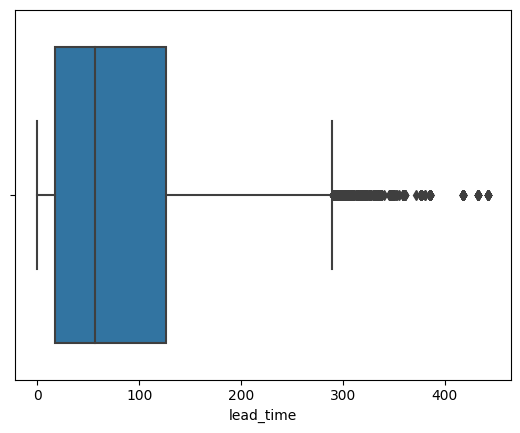

In [ ]:
sns.boxplot(x=data["lead_time"])

<Axes: xlabel='avg_price_per_room'>

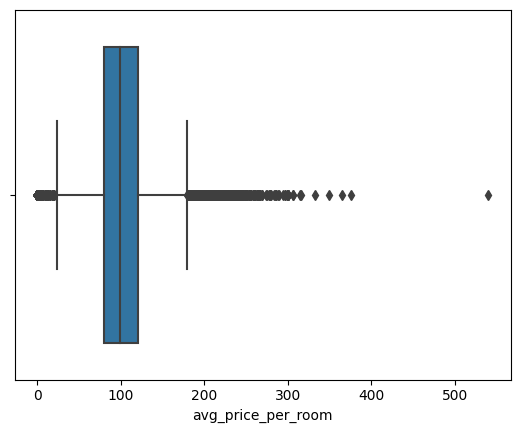

In [ ]:
sns.boxplot(x=data["avg_price_per_room"])

<ipython-input-42-049c941b5489>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

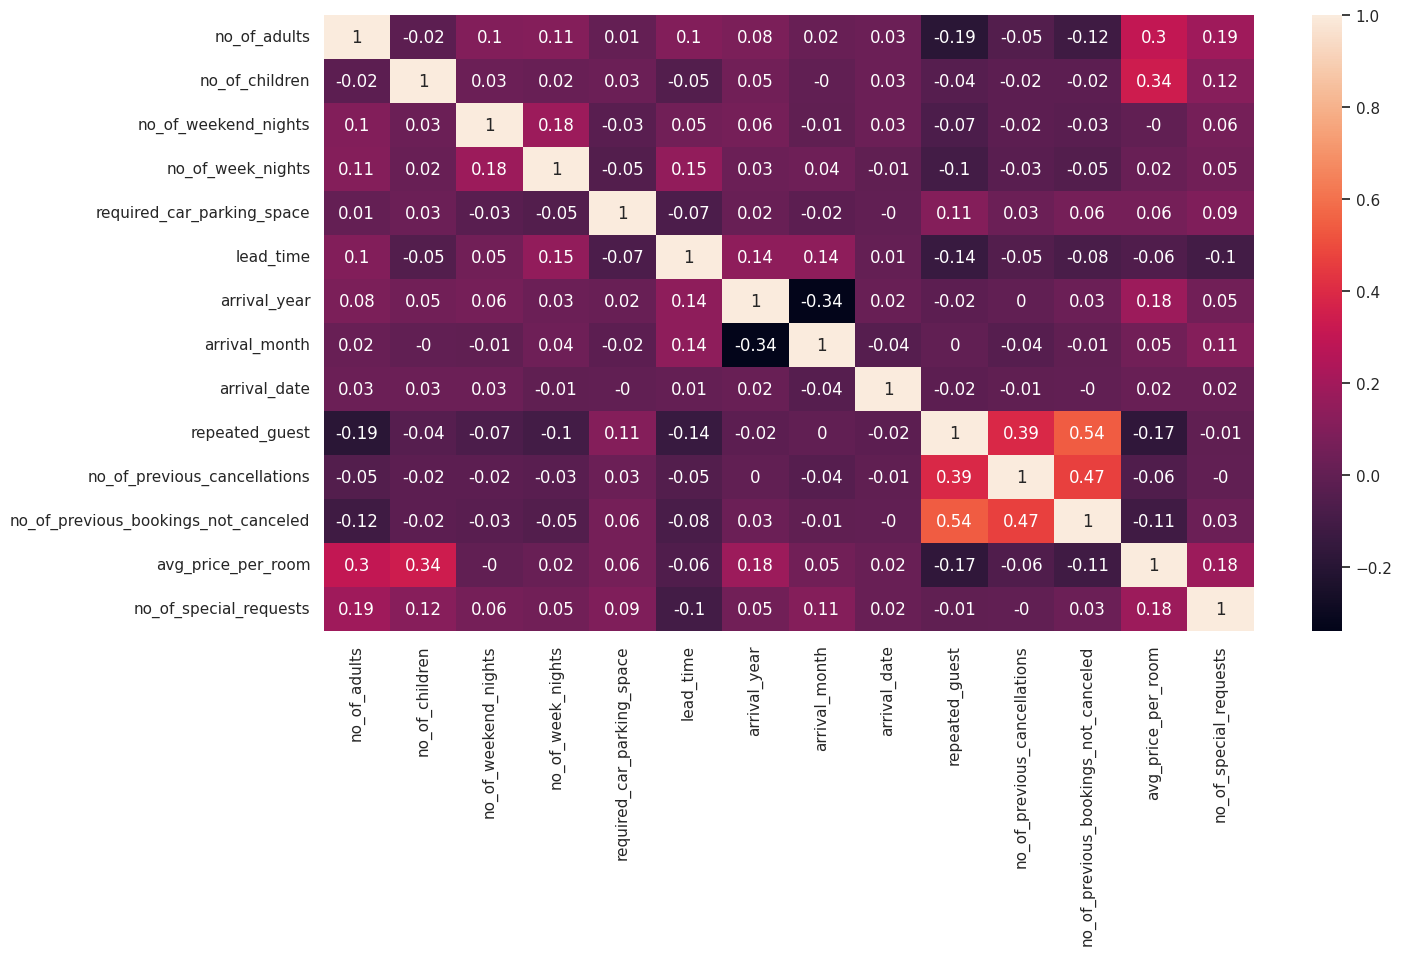

In [42]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr().round(2), annot = True)

# **Pré Processamento dos Dados**


In [117]:
data.duplicated().sum()

0

In [118]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [137]:
data = data.drop('Booking_ID', axis='columns')

In [138]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

data['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(data['room_type_reserved'])
data['market_segment_type'] = label_encoder_market_segment_type.fit_transform(data['market_segment_type'])
data['booking_status'] = label_encoder_booking_status.fit_transform(data['booking_status'])

In [139]:
X = data.drop('booking_status', axis = 1)
X = X.values
y = data['booking_status']

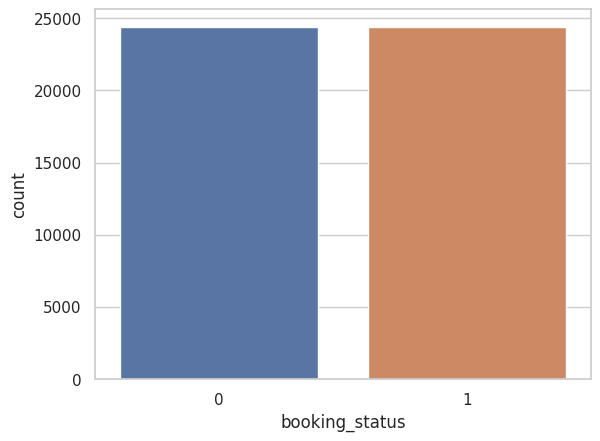

In [140]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# **Modelagem**


### **Base Line**

**KNN**

In [145]:
model = KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.7754544212108788
F1 score: 0.7749883767940167
Precision: 0.7779575431832642
Recall: 0.7755509778949874


In [ ]:
from sklearn.model_selection import GridSearchCV

k_list = list(range(1,30))
param_grid  = dict(n_neighbors = k_list)
grid = GridSearchCV(model, param_grid , cv = 10, scoring = 'accuracy', return_train_score=False)
grid.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

In [150]:
model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.8733770671040044
F1 score: 0.8731826377387403
Precision: 0.8758868620147353
Recall: 0.8734610072526819


**Naive Bayes**

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.5662839961732951
F1 score: 0.4776899187668403
Precision: 0.7110091015970728
Recall: 0.5671306787235387


**Regressão Logística**

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Acurácia: ', model.score(X_test, y_test))

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Acurácia:  0.7793494601612683
Accuracy: 0.7793494601612683
F1 score: 0.7793490882093295
Precision: 0.7793602550205481
Recall: 0.7793553971043962


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**SVM**

In [153]:
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [155]:
# Make the predictions
y_predict = svc.predict(X)
 
# Measure the performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.7793494601612683
F1 score: 0.7793490882093295
Precision: 0.7793602550205481
Recall: 0.7793553971043962


**Árvore de Decisão**

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree

from sklearn import tree
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
# Ajusta o modelo usando os dados de treinamento
model.fit(X_train,y_train)
# realizar a predição
y_pred = model.predict(X_test) 

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))


Accuracy: 0.9142408090747575
F1 score: 0.9141850578418103
Precision: 0.9154633972144834
Recall: 0.9142969036127133


In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree

from sklearn import tree
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
# Ajusta o modelo usando os dados de treinamento
model.fit(X_train,y_train)
# realizar a predição
y_pred = model.predict(X_test) 

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))


Accuracy: 0.9158808254749214
F1 score: 0.9158413350997019
Precision: 0.9167854037558585
Recall: 0.9159290820486821


## **Esemble**

**Random Forest**

In [158]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model = RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Accuracy: 0.9383627169605029


Number of Estimators: 1 Accuracy: 0.8806204728713953
Number of Estimators: 11 Accuracy: 0.9299576329096624
Number of Estimators: 21 Accuracy: 0.9339210058767254
Number of Estimators: 31 Accuracy: 0.9352193521935219
Number of Estimators: 41 Accuracy: 0.9360393603936039
Number of Estimators: 51 Accuracy: 0.9369277026103594
Number of Estimators: 61 Accuracy: 0.9366543665436654
Number of Estimators: 71 Accuracy: 0.9368593685936859
Number of Estimators: 81 Accuracy: 0.9388410550772175
Number of Estimators: 91 Accuracy: 0.9378843788437884
Melhor n: 81  com acurácia: 0.9388410550772175


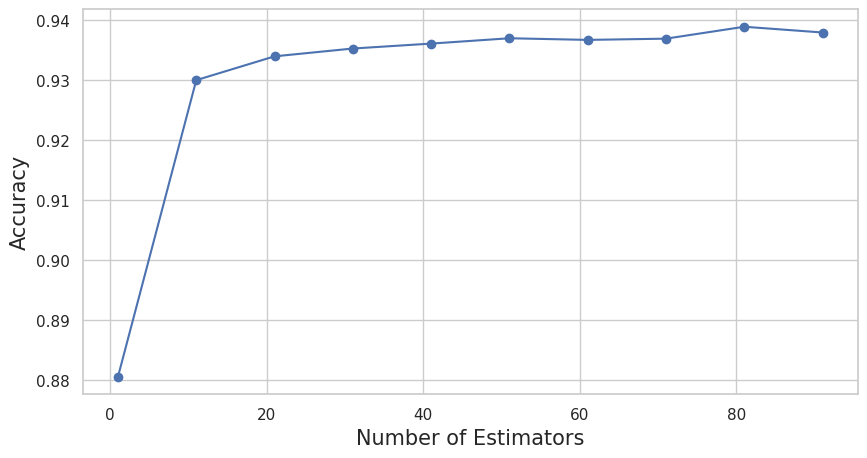

In [159]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [160]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model = RandomForestClassifier(n_estimators=91, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Accuracy: 0.9374060407270739
F1 score: 0.9374022419624904
Precision: 0.9375601156372627
Recall: 0.9374259501578162


**XGBClassifier**

In [161]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions, average="macro"))
print('Precision:', precision_score(y_test, predictions, average="macro"))
print('Recall:', recall_score(y_test,predictions, average="macro"))

Accuracy: 0.8916905835725024
F1 score: 0.8916891628883032
Precision: 0.8916958248255951
Recall: 0.8916869063965167
